In [ ]:
import numpy as np  # for handle array
import pandas as pd # for handle DataFrame

import matplotlib.pyplot as plt # for visualise data
import seaborn as sns         # for easier ploting

from sklearn.linear_model import LogisticRegression   # simple linear classifier
from sklearn.svm import SVC                             # both linear,non-linear by kernel trick
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler,LabelEncoder # preprocessing tools
from sklearn.model_selection import train_test_split , GridSearchCV          # spliting tool
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report #evaluation
from imblearn.under_sampling import RandomUnderSampler  # to solve imbalcement problems
from imblearn.over_sampling import SMOTE  # to over sample the lower class

In [ ]:
dataset=pd.read_csv('/content/Healthcare-Diabetes.csv')

# data exploring

In [ ]:
df=dataset
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
df.shape


(2768, 10)

In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
for i in df.columns :
    print(df[i].value_counts())

Id
2752    1
2751    1
2750    1
2749    1
2748    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 2768, dtype: int64
Pregnancies
1     491
0     412
2     387
3     270
4     259
5     198
6     181
7     145
8     134
9      98
10     78
11     35
13     32
12     32
14      9
17      4
15      3
Name: count, dtype: int64
Glucose
99     66
100    61
102    52
129    51
106    50
       ..
177     3
191     3
186     3
198     3
67      3
Name: count, Length: 136, dtype: int64
BloodPressure
70     201
74     197
78     173
68     170
64     163
72     162
80     138
76     132
60     129
62     128
0      125
82     113
66      95
88      92
84      84
90      77
58      75
86      74
50      44
56      43
54      42
52      40
75      28
65      26
94      24
85      20
92      20
48      18
44      15
96      12
106     12
100     12
98      11
110     10
46       8
104      7
108      7
55       6
30       5
61       5
114      4
102      4
122   

In [ ]:
df.dtypes

,0
Id,int64
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
print("\nNumber of duplicated rows:", df.duplicated().sum())

print("\nNumber of unique values in each column:")
print(df.nunique())

print("\nUnique values in 'Outcome':", df['Outcome'].unique())

print("\nValue counts of 'Outcome':")
print(df['Outcome'].value_counts())



Number of duplicated rows: 0

Number of unique values in each column:
Id                          2768
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 53
Insulin                      187
BMI                          253
DiabetesPedigreeFunction     523
Age                           52
Outcome                        2
dtype: int64

Unique values in 'Outcome': [1 0]

Value counts of 'Outcome':
Outcome
0    1816
1     952
Name: count, dtype: int64


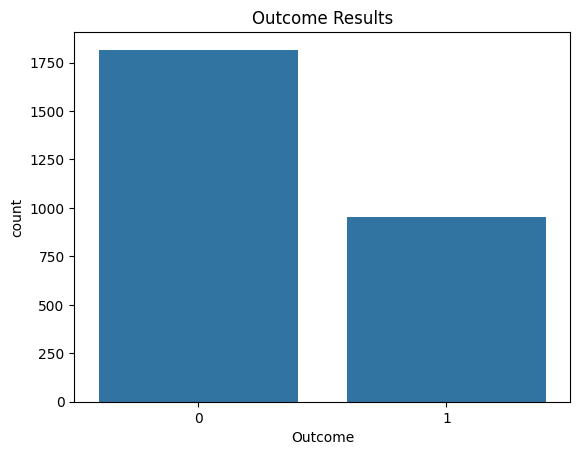

In [ ]:
sns.countplot(x=df['Outcome'])
plt.title('Outcome Results')
plt.show()

### data is not balanced

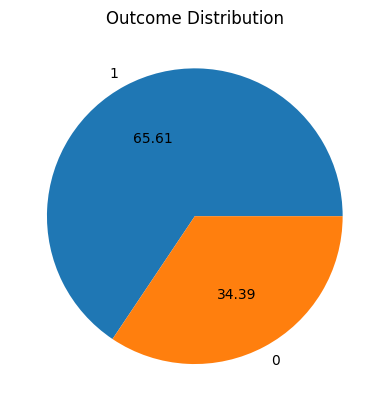

In [ ]:
plt.pie(df.groupby(by=["Outcome"]).size(), labels=df["Outcome"].unique(), autopct="%0.2f")
plt.title('Outcome Distribution')
plt.show()

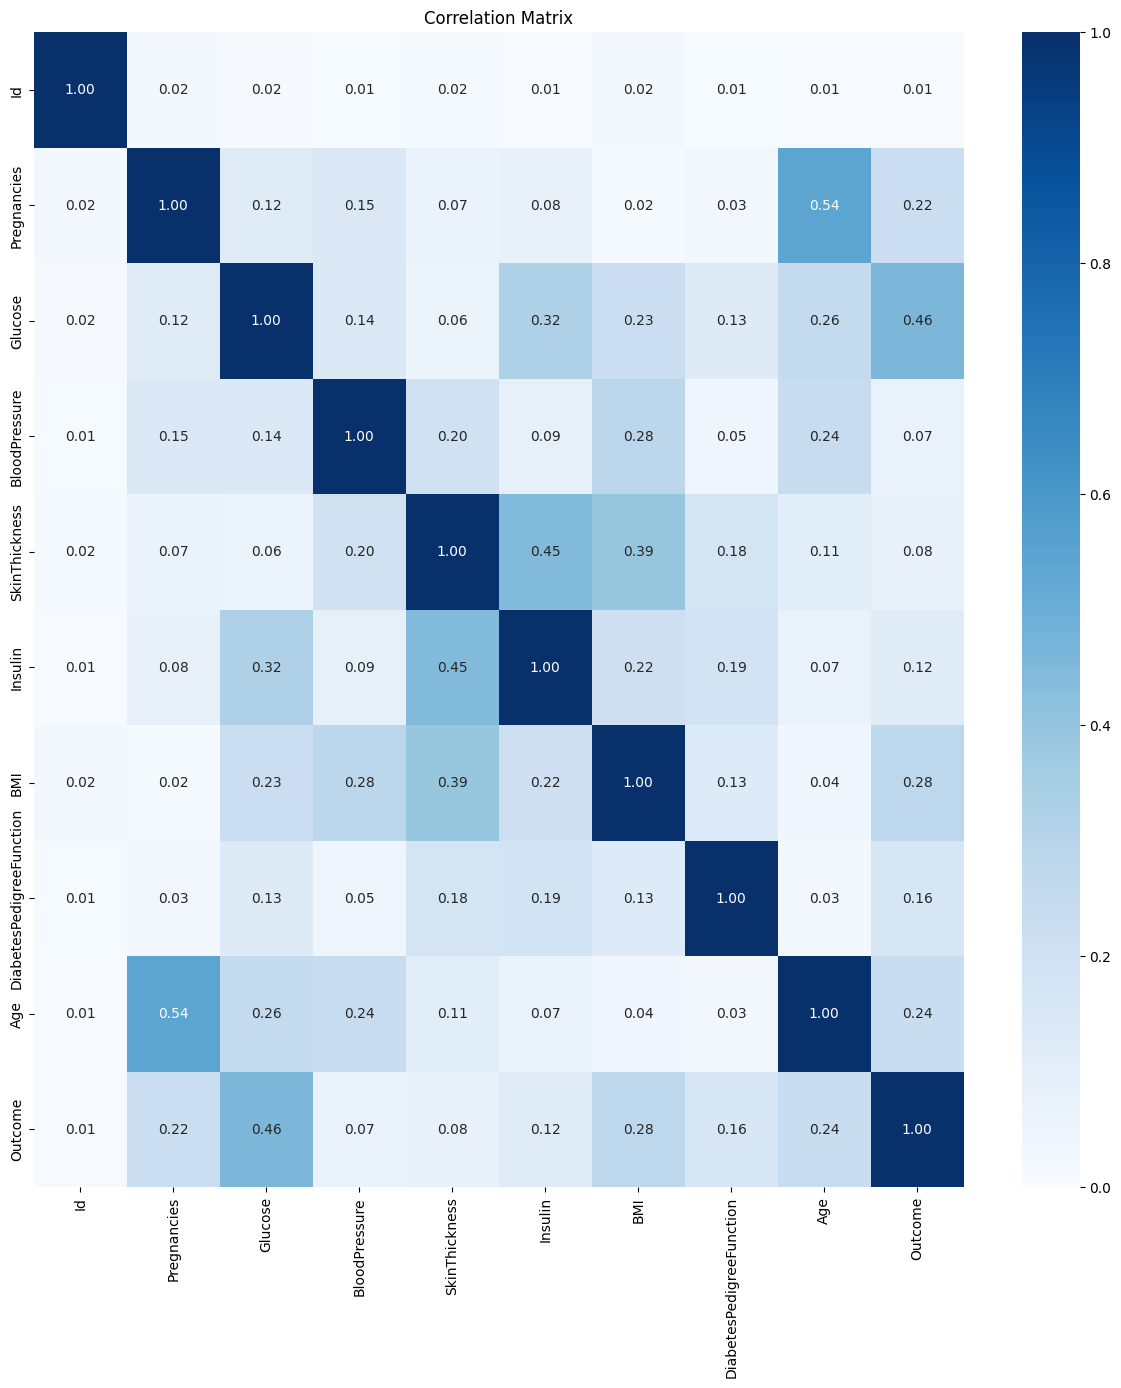

In [ ]:
corr = abs(df.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


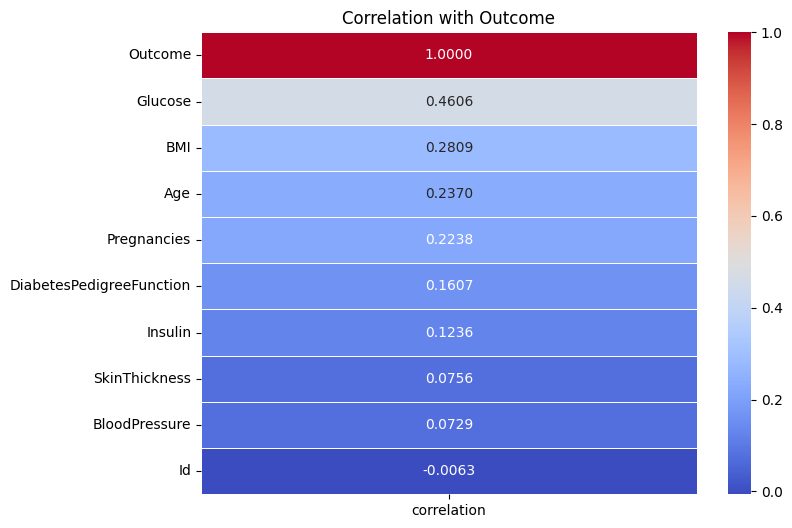

In [ ]:
corr_with_outcome = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr_with_outcome, columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

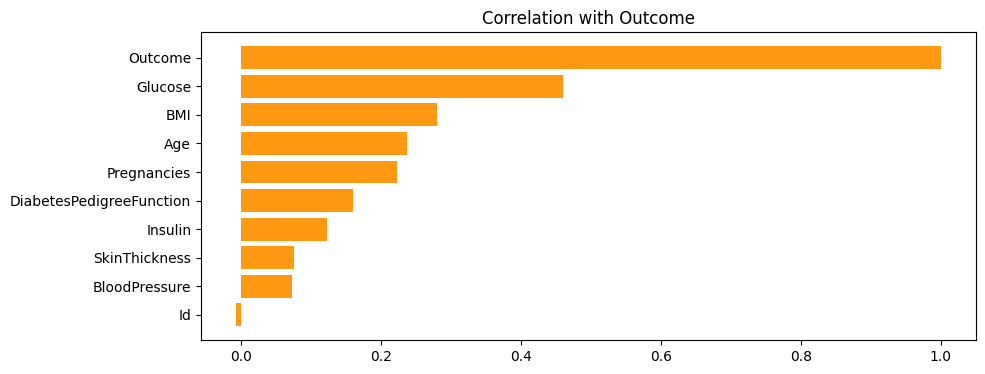

In [ ]:
outcome_corr = pd.DataFrame(df.corr()['Outcome'].sort_values(ascending=True))
plt.figure(figsize=(10, 4))
plt.barh(outcome_corr.index, outcome_corr['Outcome'], color="#FF9912")
plt.title('Correlation with Outcome')
plt.show()

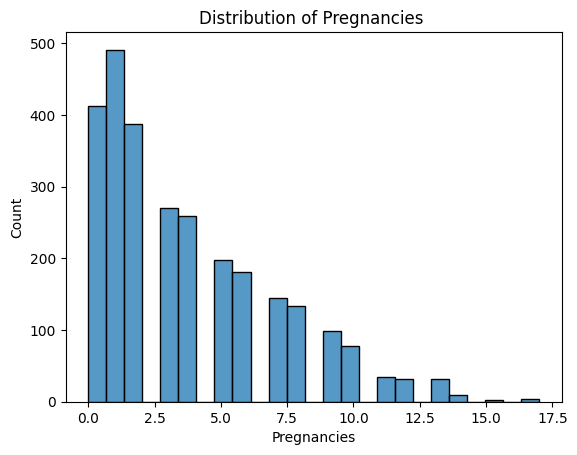

In [ ]:
sns.histplot(x=df.Pregnancies, bins=25)
plt.title('Distribution of Pregnancies ')
plt.show()

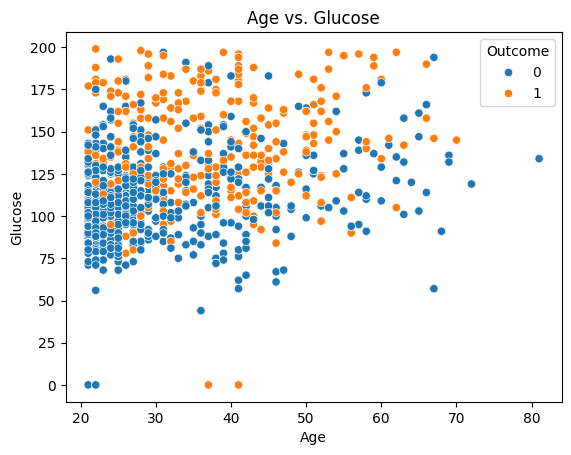

In [ ]:
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.title('Age vs. Glucose')
plt.show()

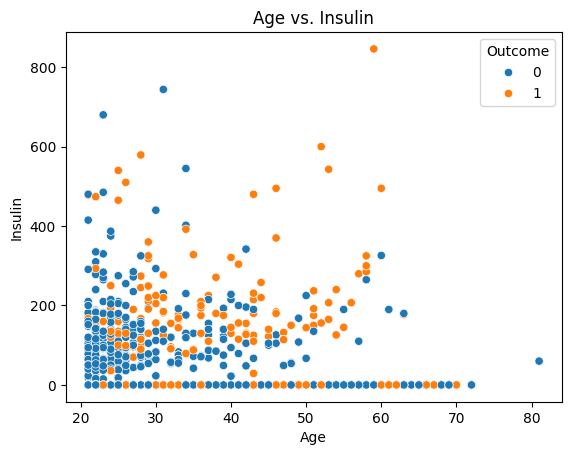

In [ ]:
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data=df)
plt.title('Age vs. Insulin')
plt.show()


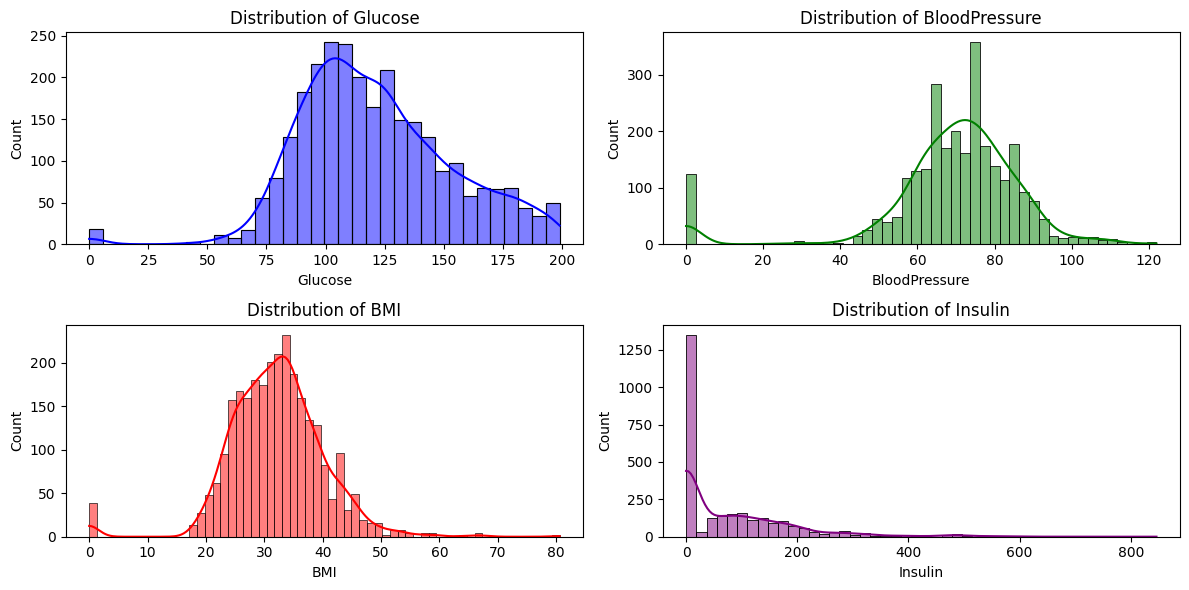

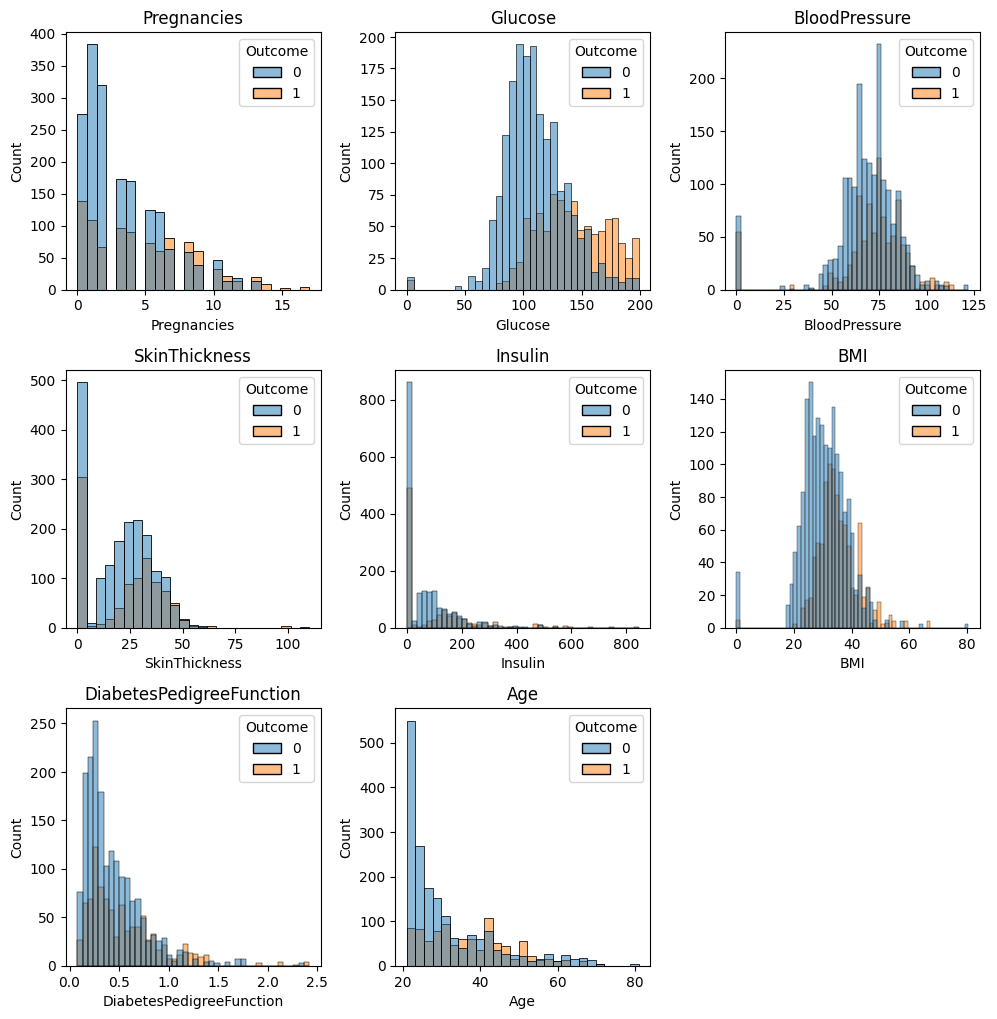

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')
plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')
plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')
plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')
plt.tight_layout()
plt.show()

num_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10, 20))
for i in range(len(num_list)):
    plt.subplot(6, 3, i + 1)
    plt.title(num_list[i])
    sns.histplot(data=df, x=df[num_list[i]], hue='Outcome')
plt.tight_layout()
plt.show()


_________________________________________

In [ ]:
# from df.describe() we find that there are some outliers in outliers
#outliers=['Insulin','SkinThickness']
#for i in outliers :
 #   max=df[i].mean()*2.5
  #  df=df[df[i]<max]

In [ ]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls


In [ ]:
index_list = []
num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
for feature in num:
    index_list.extend(outliers(df,feature))


In [ ]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())

In [ ]:
df.shape

(2419, 10)

## now data is clean of outliers and nulls

______________________________________
______________________________________

In [ ]:
df.drop(columns='Id',inplace=True)

In [ ]:
#X,y= RandomUnderSampler().fit_resample(imb_X, imb_y)

# Modelling

In [ ]:
X_res=df.drop(columns='Outcome')
y_res=df['Outcome']

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X_res, y_res)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

## Random Forest

In [ ]:
RF_GSearch=GridSearchCV( RandomForestClassifier(),param_grid={'n_estimators':[20,50,70,100,120],
                                                                         'max_depth':[4,5,6,7,8]},cv=5,
                                                                          verbose=1)

In [ ]:
#sample=df.sample(n=10000)
# RF_GSearch.fit(sample.drop(columns='CovidPos'),sample['CovidPos'])

In [ ]:
RF_GSearch.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [20, 50, 70, 100, 120]},
             verbose=1)

In [ ]:
RF_GSearch.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [ ]:
random_forest=RandomForestClassifier(max_depth= 8, n_estimators= 100)

In [ ]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
RF_pred=random_forest.predict(x_test)

In [ ]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       400
           1       0.90      0.97      0.94       424

    accuracy                           0.93       824
   macro avg       0.94      0.93      0.93       824
weighted avg       0.93      0.93      0.93       824



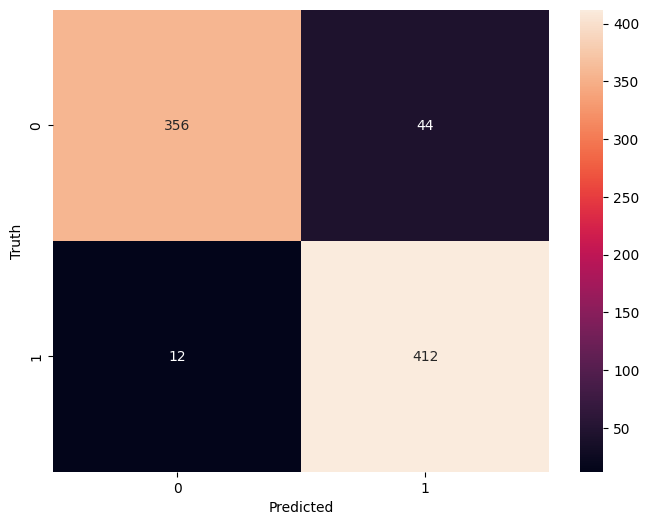

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,RF_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


_________________________________________________________
## KNN

In [ ]:
knn_GSearch=GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10],
                                                           'p':[1,2] },cv=5,verbose=1)

In [ ]:
knn_GSearch.fit(x_train,y_train)
knn_GSearch.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'n_neighbors': 2, 'p': 1}

In [ ]:
knn=KNeighborsClassifier(n_neighbors= 2, p=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [ ]:
knn_pred=knn.predict(x_test)

In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.99      0.99      0.99       424

    accuracy                           0.99       824
   macro avg       0.99      0.99      0.99       824
weighted avg       0.99      0.99      0.99       824



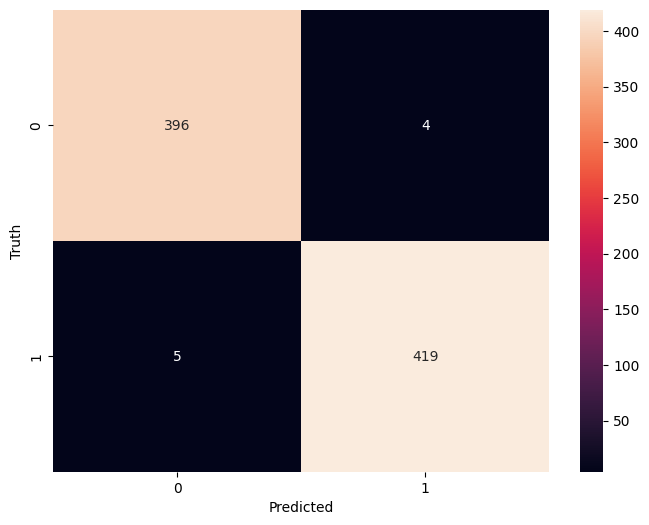

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

____________________________________________________
## SVC

In [100]:
svc_GSearch=GridSearchCV(SVC(),param_grid={'C':[0.1,10],'kernel':['linear','rbf','sigmoid']
                                           ,'degree':[2,3,4]},cv=5,verbose=1)

In [101]:
svc_GSearch.fit(x_train,y_train)
svc_GSearch.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'C': 10, 'degree': 2, 'kernel': 'rbf'}

In [106]:
svc=SVC(C= 10, degree=2, kernel= 'rbf')

In [107]:
svc.fit(x_train,y_train)

SVC(C=10, degree=2)

In [108]:
svc_pred=svc.predict(x_test)

In [109]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       400
           1       0.77      0.84      0.80       424

    accuracy                           0.79       824
   macro avg       0.79      0.78      0.78       824
weighted avg       0.79      0.79      0.78       824



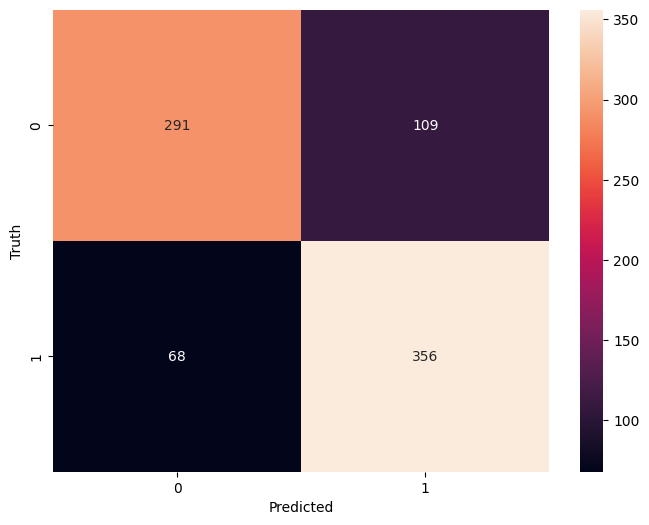

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,svc_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Dicision tree

In [ ]:
dt_GSearch=GridSearchCV(DecisionTreeClassifier(),param_grid={'max_depth':[2,3,4,5,6,7,8,9,10]},cv=5,verbose=1)

In [ ]:
dt_GSearch.fit(x_train,y_train)
dt_GSearch.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 10}

In [ ]:
DTree=DecisionTreeClassifier(max_depth=10)

In [ ]:
DTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
DTree_pred=DTree.predict(x_test)

In [ ]:
print(classification_report(y_test,DTree_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       400
           1       0.94      0.97      0.95       424

    accuracy                           0.95       824
   macro avg       0.95      0.95      0.95       824
weighted avg       0.95      0.95      0.95       824



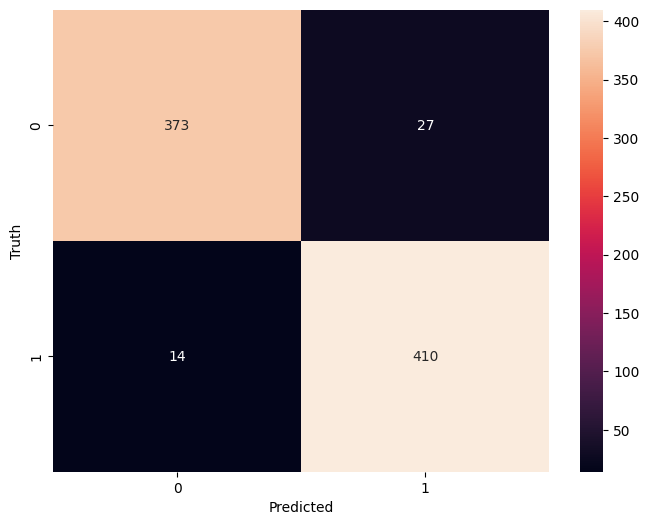

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,DTree_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

____________________________________________________
##Logistic Regression

In [ ]:
lr_GSearch=GridSearchCV(LogisticRegression(),param_grid={'C':[0.1,1,10],'penalty':['l2','l1','elasticnet'],
                                                           'max_iter':[2000,4000,7000,10000]},cv=5,verbose=1)

In [ ]:
lr_GSearch.fit(x_train,y_train)
lr_GSearch.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

{'C': 1, 'max_iter': 2000, 'penalty': 'l2'}

In [ ]:
lr=LogisticRegression(max_iter=2000)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
lr_pred=lr.predict(x_test)

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       400
           1       0.77      0.75      0.76       424

    accuracy                           0.75       824
   macro avg       0.75      0.75      0.75       824
weighted avg       0.75      0.75      0.75       824



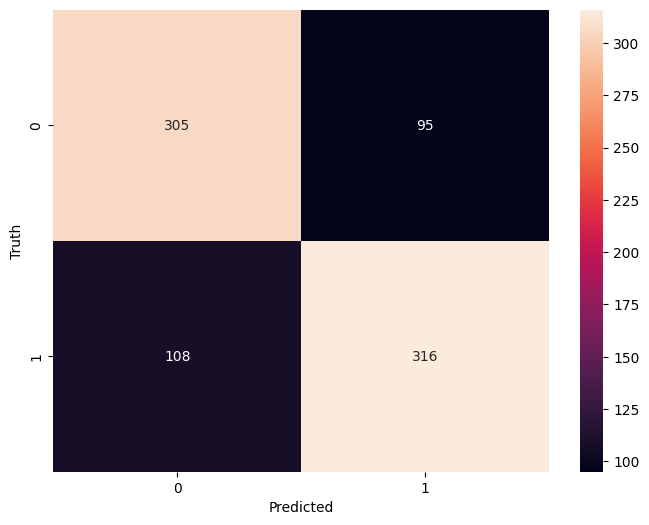

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

_______________________________________________
## Gausian Naive Bayes

In [ ]:
NB=GaussianNB()


In [ ]:
NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
NB_pred=NB.predict(x_test)

In [ ]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       400
           1       0.75      0.75      0.75       424

    accuracy                           0.74       824
   macro avg       0.74      0.74      0.74       824
weighted avg       0.74      0.74      0.74       824



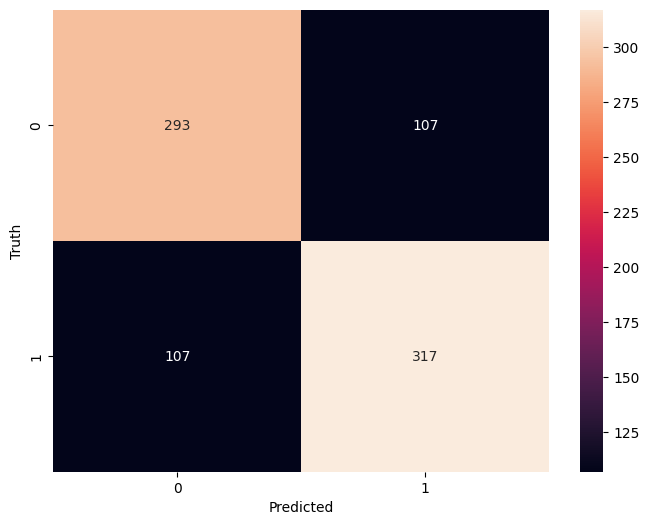

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,NB_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print('Naive Bayes')
print(classification_report(y_test,NB_pred))
print('_'*20)
print('Logistic Regression')
print(classification_report(y_test,lr_pred))
print('_'*20)
print('Decision Tree')
print(classification_report(y_test,DTree_pred))
print('_'*20)
print('SVC')
print(classification_report(y_test,svc_pred))
print('_'*20)
print('KNN')
print(classification_report(y_test,knn_pred))
print('_'*20)
print('Random Forest')
print(classification_report(y_test,RF_pred))


Naive Bayes
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       399
           1       0.65      0.53      0.58       206

    accuracy                           0.74       605
   macro avg       0.71      0.69      0.70       605
weighted avg       0.73      0.74      0.73       605

____________________
Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       399
           1       0.77      0.51      0.61       206

    accuracy                           0.78       605
   macro avg       0.78      0.71      0.73       605
weighted avg       0.78      0.78      0.77       605

____________________
Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       399
           1       0.90      0.92      0.91       206

    accuracy                           0.94       605
   macro avg       0.93      0.93      0

# Best Performance was for KNeaighbors (95) before resample data and still after resampling with (99)